# Analysis of stock prices in different time periods


**NOTE:** `base date point` means that base value will be set to the first date in dataset.

Example: if we want to get daily prices within a week then `base date point` means that the base value will be set **only** for data point with first date

In [1]:
import sys

sys.path.append('..')

from analysis_base_first_date import Column
from common import plot, YahooRange

from loguru import logger
import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot


FILENAME = "sp500/sp500.csv"
LIMIT = None

logger.remove()
logger.add(sys.stdout, level="INFO")

pass

## Monthly stock price fluctuations within a year

In [2]:
from analysis_base_first_date import get_best_month

df = get_best_month(FILENAME, YahooRange.YEARS_20, limit=LIMIT)
df

,year,month,Symbol,Percent (mean)
0,2001,1,SWKS,100.0
1,2001,2,SWKS,81.063123
2,2001,3,SWKS,39.202658
3,2001,4,SWKS,40.863787
4,2001,5,SWKS,65.887046
...,...,...,...,...
108176,2020,8,CTVA,96.739498
108177,2020,9,CTVA,96.067227
108178,2020,10,CTVA,97.075627
108179,2020,11,CTVA,111.865542


       Percent (mean)
month                
1          507.755035
2           548.49062
3           553.07701
4          547.281632
5          567.780294


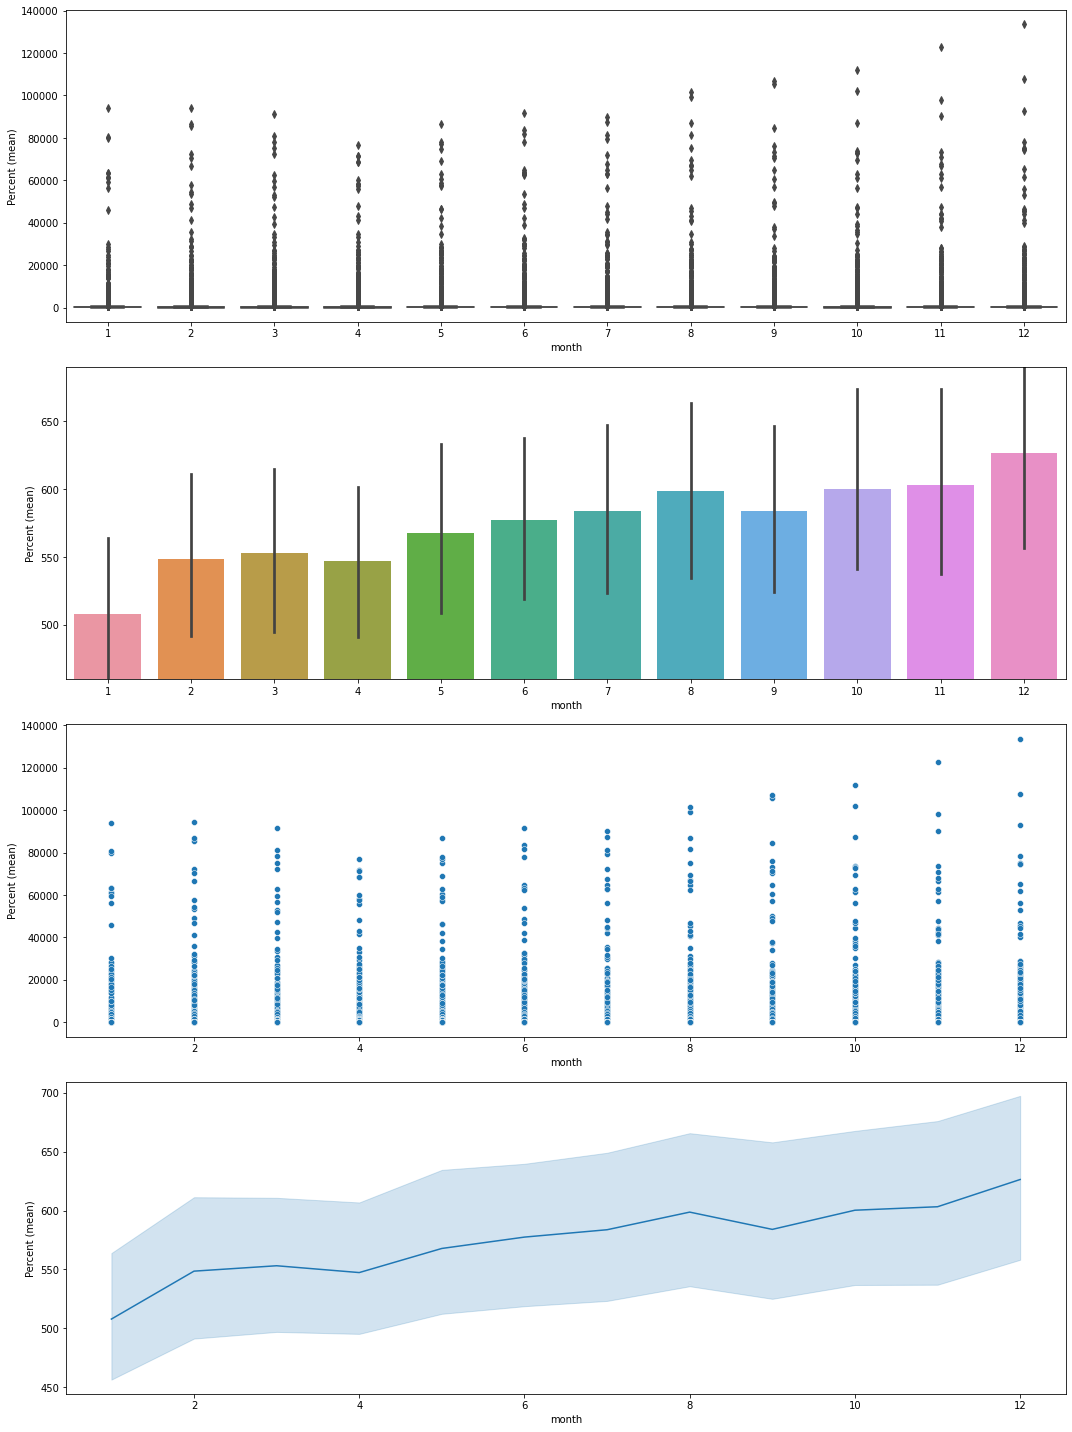

In [3]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Weekly stock price fluctuations within a year

In [4]:
from analysis_base_first_date import get_best_week

df = get_best_week(FILENAME, YahooRange.YEARS_20, limit=LIMIT)

df

,year,week,Symbol,Percent (mean)
0,2001,1,TXT,100.0
1,2001,2,TXT,101.851852
2,2001,3,TXT,102.910053
3,2001,4,TXT,101.587302
4,2001,5,TXT,102.222221
...,...,...,...,...
469467,2020,49,KSU,1883.358049
469468,2020,50,KSU,1911.70368
469469,2020,51,KSU,1952.691424
469470,2020,52,KSU,1923.851786


      Percent (mean)
week                
1         528.976614
2          539.76455
3         525.041477
4         528.702092
5           548.1239


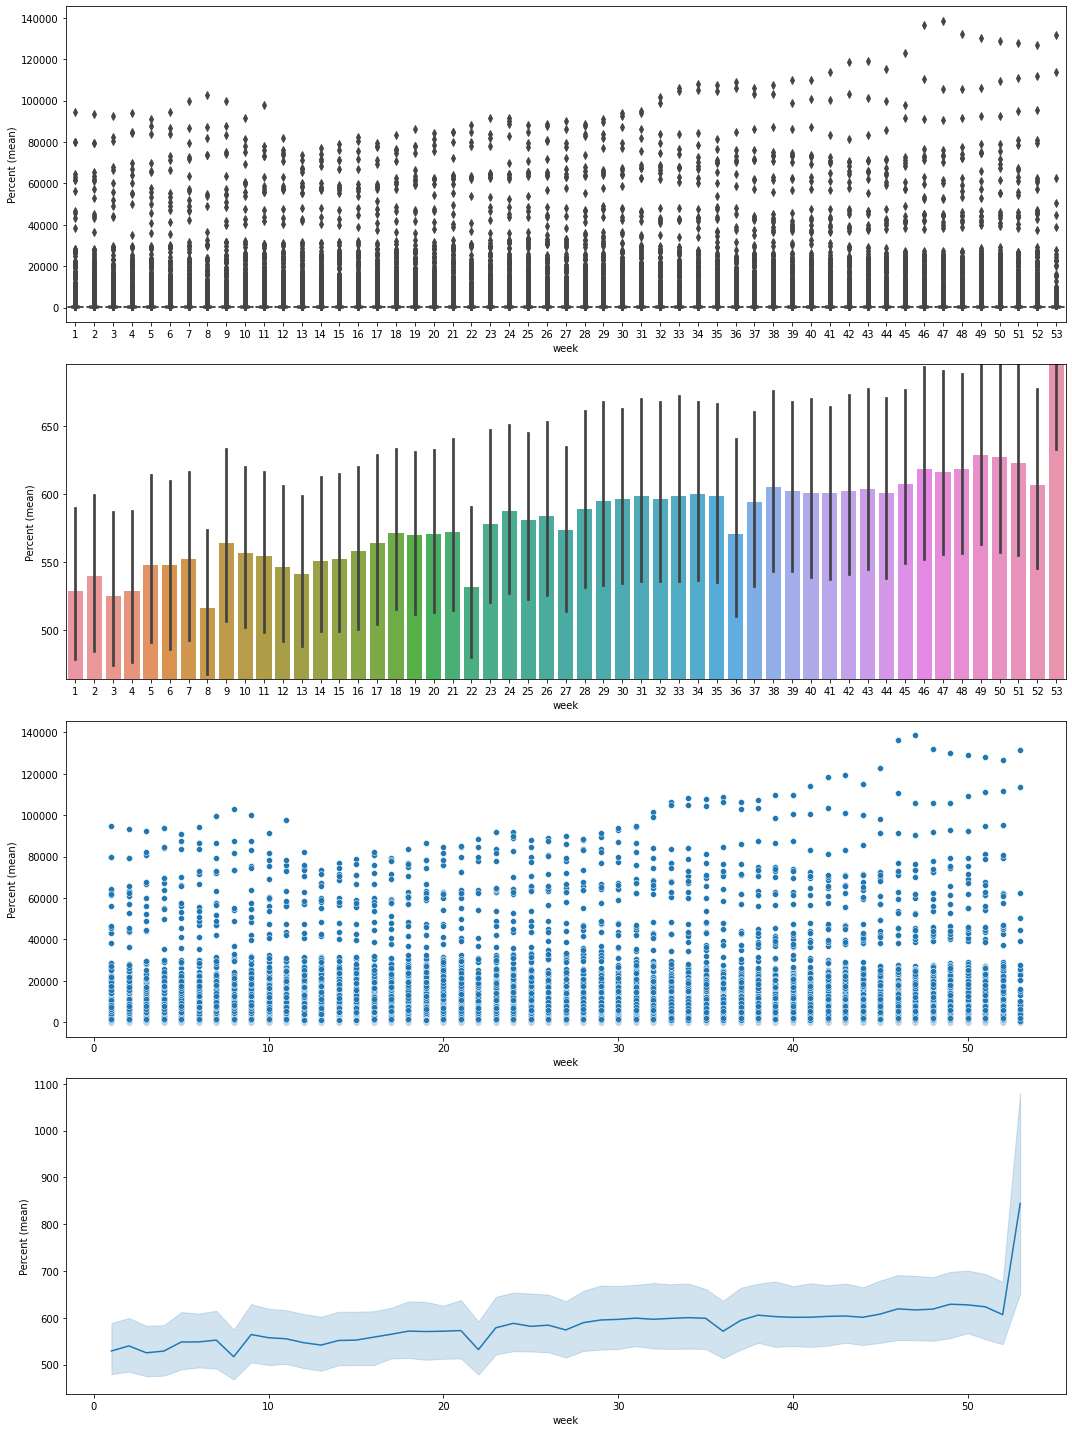

In [5]:
plot(x=Column.WEEK, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a month

In [6]:
from analysis_base_first_date import get_best_month_day

df = get_best_month_day(FILENAME, YahooRange.YEARS_20, limit=LIMIT)

df

,year,month,day,Symbol,Percent (mean)
0,2001,7,25,ZBH,100.0
1,2001,7,26,ZBH,97.9661
2,2001,7,27,ZBH,95.593223
3,2001,7,30,ZBH,96.271185
4,2001,7,31,ZBH,96.474573
...,...,...,...,...,...
2264184,2020,12,24,TSCO,27674.353745
2264185,2020,12,28,TSCO,27845.64568
2264186,2020,12,29,TSCO,27102.116843
2264187,2020,12,30,TSCO,26994.824219


     Percent (mean)
day                
1        503.675396
2        504.227772
3        502.113545
4        506.085608
5        501.854768


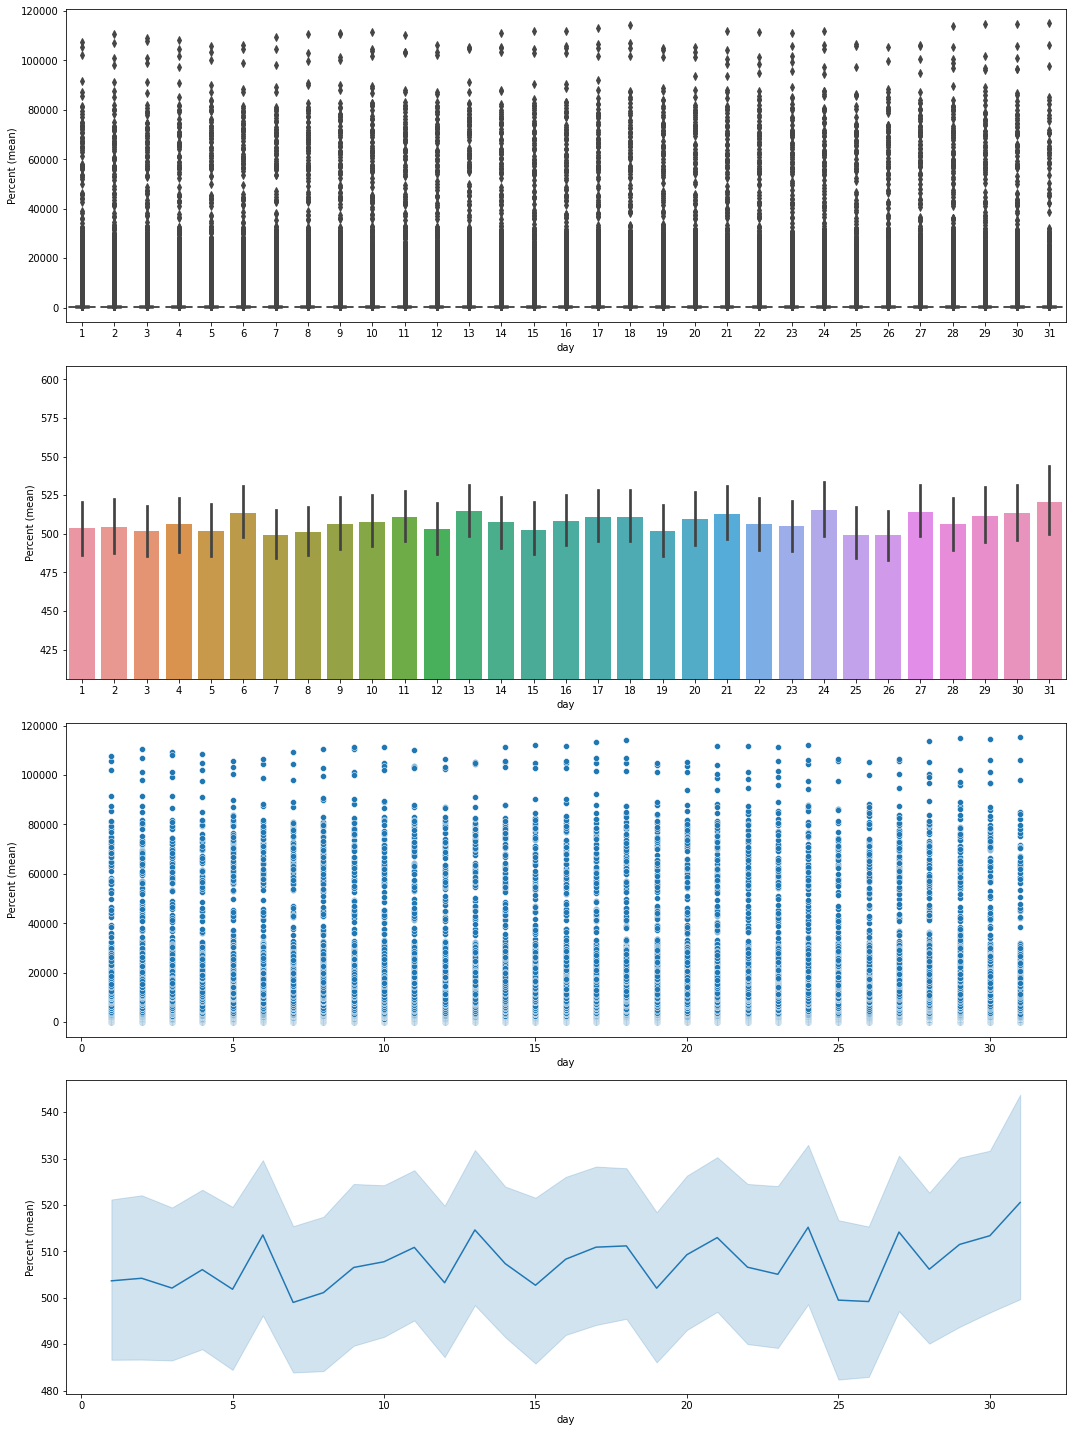

In [7]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [8]:
from analysis_base_first_date import get_best_weekday


df = get_best_weekday(FILENAME, YahooRange.YEARS_20, limit=LIMIT)

df

,year,week,weekday,Percent (mean)
0,2001,30,2,100.0
1,2001,30,3,97.9661
2,2001,30,4,95.593223
3,2001,31,0,96.271185
4,2001,31,1,96.474573
...,...,...,...,...
2264184,2020,52,3,27674.353745
2264185,2020,53,0,27845.64568
2264186,2020,53,1,27102.116843
2264187,2020,53,2,26994.824219


         Percent (mean)
weekday                
0            508.245284
1            507.769809
2            506.127979
3            507.668426
4            506.807758


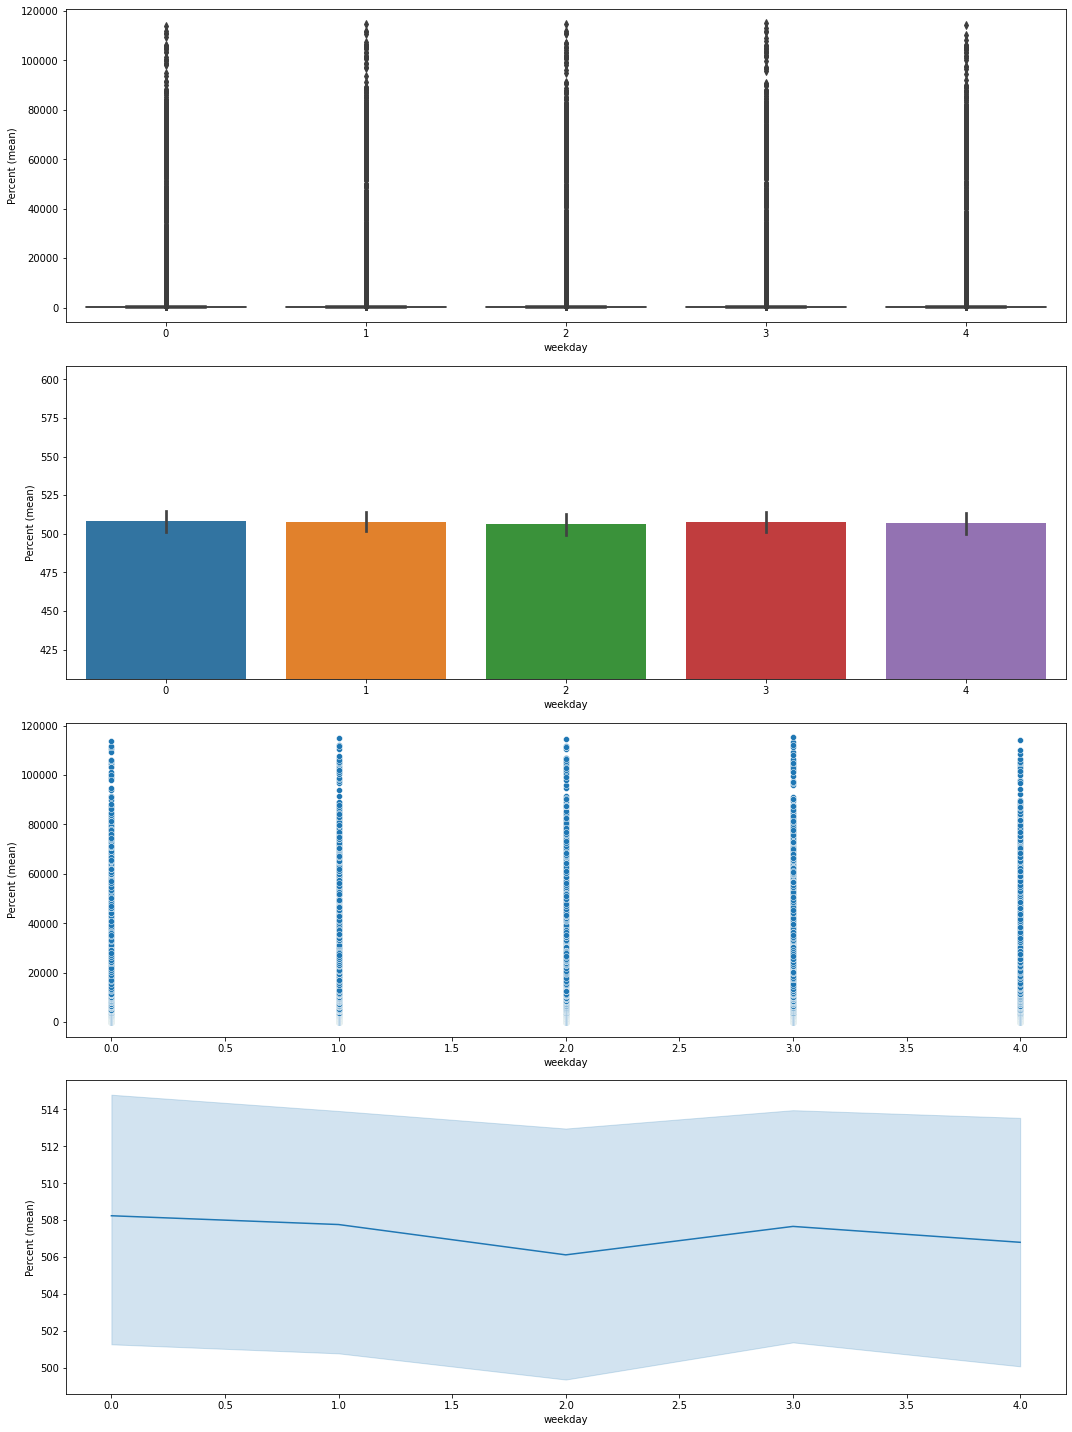

In [9]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)

## Hourly stock price fluctuations within a day

In [10]:
from analysis_base_first_date import get_best_hour

df = get_best_hour(FILENAME, YahooRange.YEARS_2, limit=LIMIT)

df

,year,week,day,hour,Symbol,Percent (mean)
0,2020,14,3,9,OTIS,100.0
1,2020,14,3,10,OTIS,99.065634
2,2020,14,3,11,OTIS,104.238834
3,2020,14,3,12,OTIS,106.494983
4,2020,14,3,13,OTIS,111.109845
...,...,...,...,...,...,...
5416,2020,53,31,11,CTVA,145.62924
5417,2020,53,31,12,CTVA,146.194416
5418,2020,53,31,13,CTVA,146.156743
5419,2020,53,31,14,CTVA,146.495854


      Percent (mean)
hour                
9         137.134953
10        137.466385
11        137.414052
12        137.179864
13        137.473023


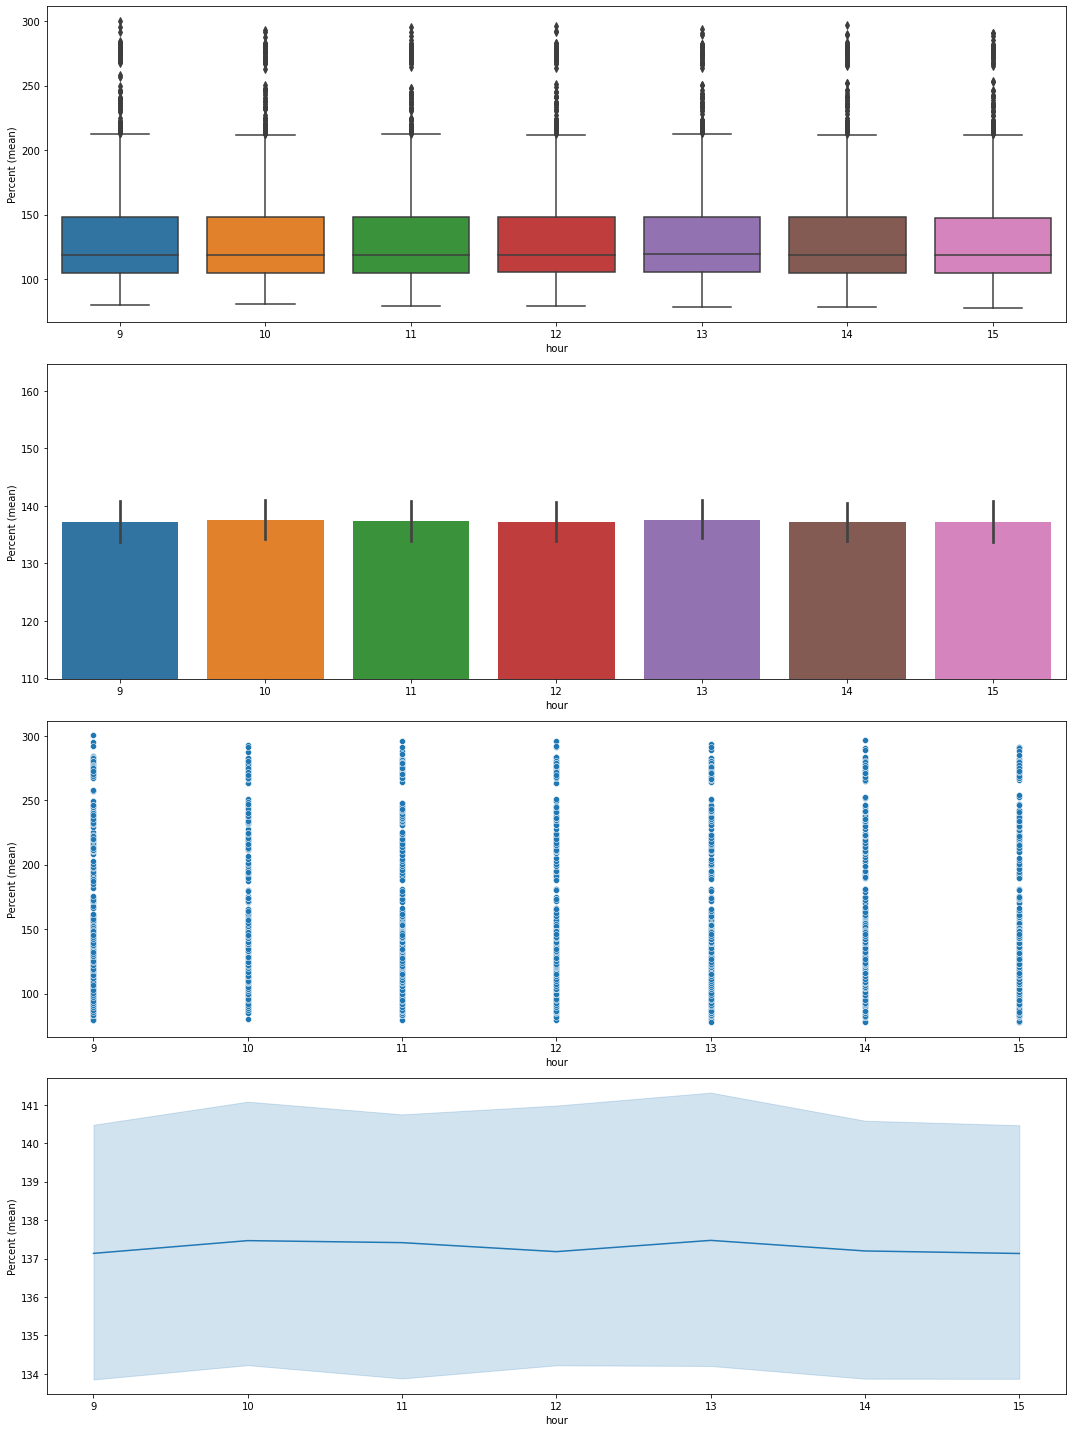

In [11]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df)

## Hourly and quarterly stock price fluctuations within an day

In [12]:
from analysis_base_first_date import get_best_time

df = get_best_time(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,time,Symbol,Percent (mean)
0,2021,11,18,9,30,9.5,TXT,100.0
1,2021,11,18,10,0,10.0,TXT,100.866425
2,2021,11,18,10,30,10.5,TXT,102.518044
3,2021,11,18,11,0,11.0,TXT,102.400718
4,2021,11,18,11,30,11.5,TXT,102.238263
...,...,...,...,...,...,...,...,...
236800,2021,19,12,13,30,13.5,UDR,100.044475
236801,2021,19,12,14,0,14.0,UDR,99.866575
236802,2021,19,12,14,30,14.5,UDR,99.466307
236803,2021,19,12,15,0,15.0,UDR,100.155659


      Percent (mean)
time                
9.5       102.888896
10.0      102.896852
10.5      102.887475
11.0      102.890513
11.5       103.04898


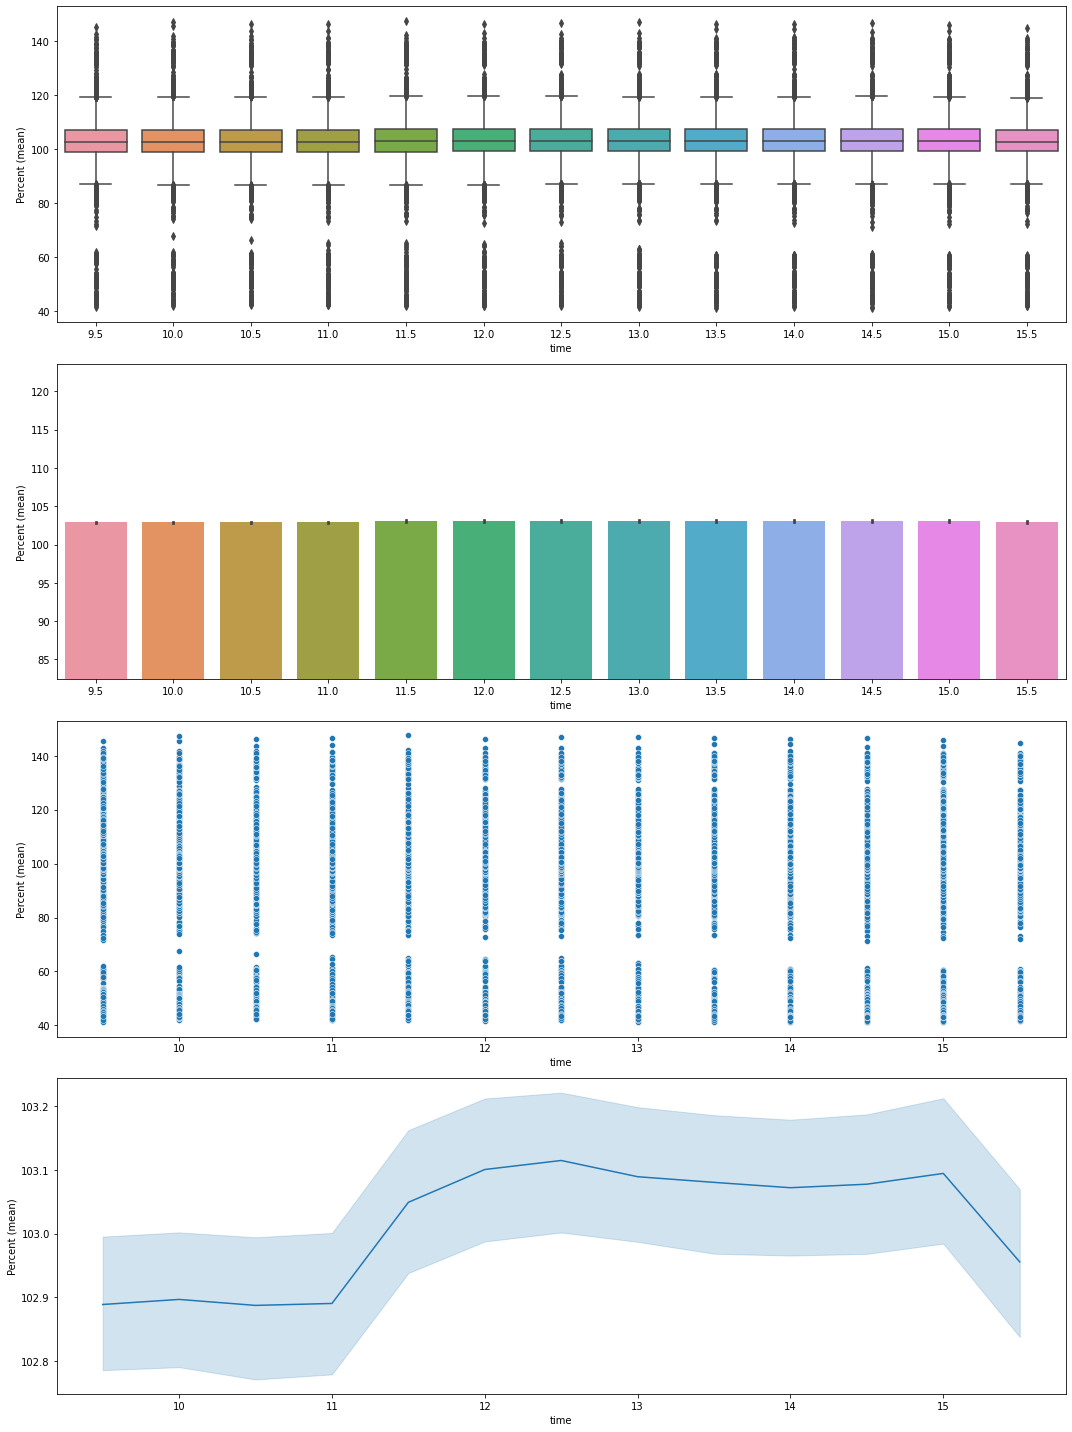

In [13]:
plot(x=Column.TIME, y=Column.PERCENT, data=df)

## Quarterly stock price fluctuations within an hour

In [14]:
from analysis_base_first_date import get_best_quarter

df = get_best_quarter(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,quarter,Symbol,Percent (mean)
0,2021,11,18,9,30,30,AME,100.0
1,2021,11,18,9,45,45,AME,100.621704
2,2021,11,18,10,0,0,AME,100.605238
3,2021,11,18,10,15,15,AME,100.666994
4,2021,11,18,10,30,30,AME,100.502306
...,...,...,...,...,...,...,...,...
471945,2021,19,12,14,45,45,LVS,84.241272
471946,2021,19,12,15,0,0,LVS,83.990891
471947,2021,19,12,15,15,15,LVS,83.778449
471948,2021,19,12,15,30,30,LVS,83.566007


         Percent (mean)
quarter                
0            103.022994
15           103.018539
30           102.998241
45           103.011395


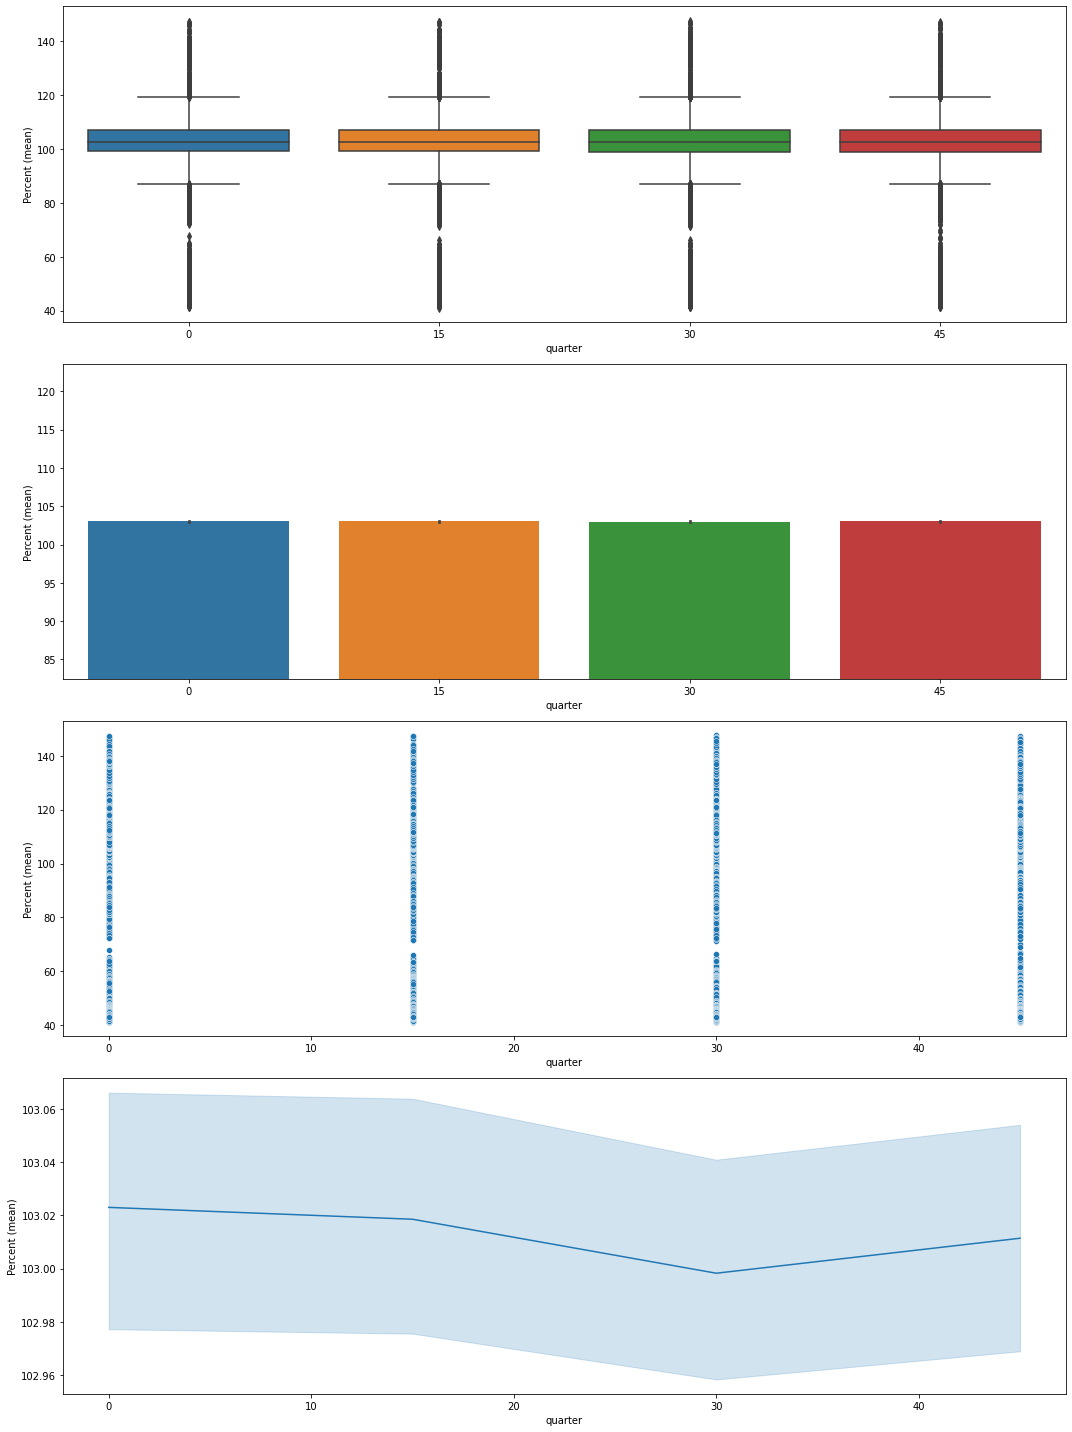

In [15]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df)